In K Means clustering, we don't have any specific value to accuracy, but we have a value to loss. We have to reduce the loss. If the cluster center has been providing loss less than the earlier loss then it is the best accuracy. 

In K Means, identification of clusters is done.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, _ = make_blobs(centers = 3, random_state= 42)   #Make_blobs return 2 value, but we used underscore as in KMeans we only needed X. We dont need y.

In [4]:
X

array([[-7.72642091, -8.39495682],
       [ 5.45339605,  0.74230537],
       [-2.97867201,  9.55684617],
       [ 6.04267315,  0.57131862],
       [-6.52183983, -6.31932507],
       [ 3.64934251,  1.40687195],
       [-2.17793419,  9.98983126],
       [ 4.42020695,  2.33028226],
       [ 4.73695639,  2.94181467],
       [-3.6601912 ,  9.38998415],
       [-3.05358035,  9.12520872],
       [-6.65216726, -5.57296684],
       [-6.35768563, -6.58312492],
       [-3.6155326 ,  7.8180795 ],
       [-1.77073104,  9.18565441],
       [-7.95051969, -6.39763718],
       [-6.60293639, -6.05292634],
       [-2.58120774, 10.01781903],
       [-7.76348463, -6.72638449],
       [-6.40638957, -6.95293851],
       [-2.97261532,  8.54855637],
       [-6.9567289 , -6.53895762],
       [-7.32614214, -6.0237108 ],
       [-2.14780202, 10.55232269],
       [-2.54502366, 10.57892978],
       [-2.96983639, 10.07140835],
       [ 3.22450809,  1.55252436],
       [-6.25395984, -7.73726715],
       [-7.85430886,

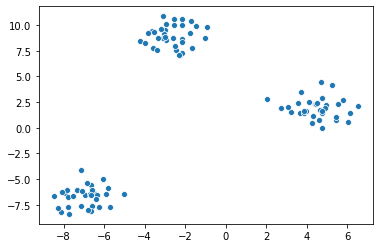

In [6]:
#To plot scatter data, lets use seaborn
import seaborn as sns
sns.scatterplot(X[:, 0], X[:, 1])   #both the values are the features.

In [7]:
#to create classes of the data by K Means, we have to minimise the loss i.e. we want to minimise the distance.
from sklearn.cluster import KMeans

In [8]:
model = KMeans(n_clusters = 2)  #n_clusters is the no of clases or clusters we want to form, n_init is the no of iterations we want to run the loop so as to minimise the error, max_iters is the no of times we want to run the inner loop so as to reach the cluster centers. 
#If the difference in error is greater than the tol value, then we come out off loop , otherwise we run the loop.

In [9]:
model.fit(X)  #here we only passed X, no y.

KMeans(n_clusters=2)

In [11]:
y_generated = model.labels_   #these are the output labels of the data

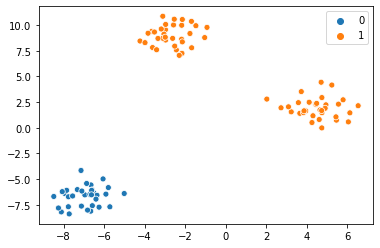

In [13]:
sns.scatterplot(X[:, 0], X[:, 1], hue = y_generated)

In [15]:
cluster_centers = model.cluster_centers_   #These are the cluster centers used by the algorithm to classify the data.

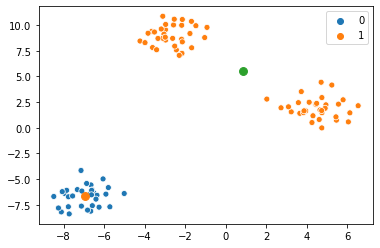

In [16]:
#Showing the cluster centers. In case of n_clusters = 2, the position of centers is one is at the center of 1 cluster and the other is between the 2 clusters
sns.scatterplot(X[:, 0], X[:, 1], hue = y_generated)
for center in cluster_centers:
    plt.scatter(center[0], center[1], s = 62)   #s is the size of the point.

# Logic - 
Everytime we have the vote, the vote goes to the cluster center which is nearest to the point. So we need to calculate the average distance travelled and for every location, we minimise this average distance. So we provide the mean of all cluster locations and the new location will be the best location. So it brings the location to the average loacation ie center or centroid. This algo is not an optimised algo, however it is not a brute force algo. 

# Custom K Means Algorithm

In [17]:
import random

In [18]:
class Cluster:   #this class contains the cluster centers
    
    def __init__(self, center):
        self.center = center
        self.points = []
        
    def distance(self, point):
        #this returns the distance between two points.
        return np.sqrt(np.sum(point - self.center) ** 2)
        
    
class CustomKMeans:

    def __init__(self, n_clusters= 3, max_iters = 10):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        
    def fit(self, X):
        clusters = []
        for i in range(self.n_clusters):
            cluster = Cluster(center = random.choice(X))   #chooses a random cluster
            clusters.append(cluster)
          
        
        for i in range(self.max_iters):
            #for every cluster there should be some initial labels.
            labels = []
            
            #going for each point
            for point in X:
                #we will ask the points, to which cluster they want to go
                #collecting distances from every cluster
                distances = []
                for cluster in clusters:
                    distances.append(cluster.distance(point))

                #finding closest cluster
                closest_index = np.argmin(distances)   #this is the index of the closest cluster
                closest_cluster = clusters[closest_index]   #this is the closest cluster
                closest_cluster.points.append(point)   #here we are putting the points to the closest clusters
                labels.append(closest_index)     #we are putting the labels of the closest index.
             #after this we have allocated every point to one of the clusters.

            #relocating the cluster centers and running the loop again
            for cluster in clusters:
                cluster.center = np.mean(cluster.points, axis = 0)
            
        self.labels_ = labels
        self.cluster_centers_ = [cluster.center for cluster in clusters]


In [21]:
model = CustomKMeans(n_clusters = 2)
model.fit(X)

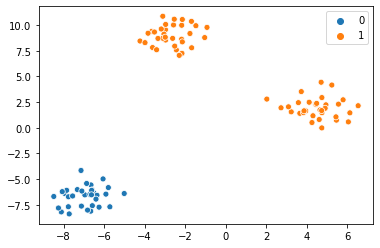

In [22]:
sns.scatterplot(X[:, 0], X[:, 1], hue = model.labels_)